In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
import gradio as gr

In [3]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
data_dir = '/Users/lykofos/Desktop/clubs/BCS-TAKNEEK/GenderOcclusionData'
train_dir = os.path.join(data_dir, 'Training')
validation_dir = os.path.join(data_dir, 'Validation')

In [8]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    classes=['female', 'male']
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    classes=['female', 'male']
)


Found 72318 images belonging to 2 classes.
Found 16813 images belonging to 2 classes.


In [9]:
# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Female/Male)
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [12]:
# Train the model 
history = model.fit(
    train_generator,
    steps_per_epoch=30,  
    epochs=5,  
    validation_data=validation_generator,
    validation_steps=10 
)


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5276 - loss: 0.7008 - val_accuracy: 0.5562 - val_loss: 0.6906
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5156 - val_loss: 0.6908
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5302 - loss: 0.6887 - val_accuracy: 0.6219 - val_loss: 0.6914
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5405 - loss: 0.6921 - val_accuracy: 0.5188 - val_loss: 0.6858
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5538 - loss: 0.6848 - val_accuracy: 0.5469 - val_loss: 0.6864


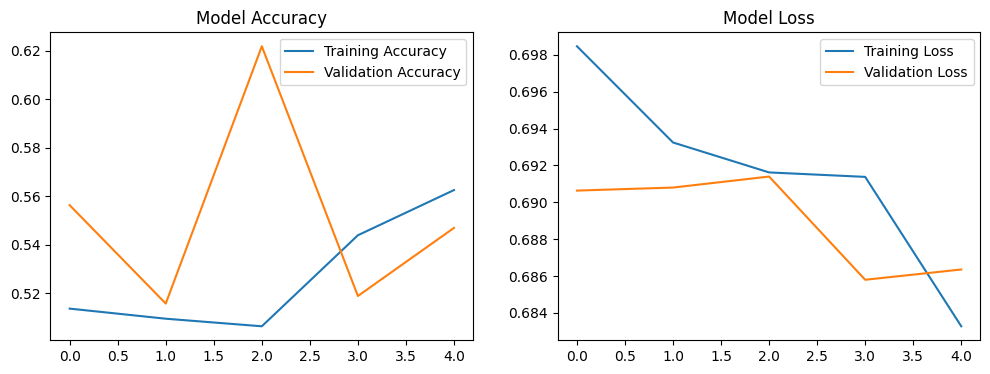

In [13]:
# Visualize training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [21]:
# Save the model
model.save('gender_classification_model_quick.keras')

In [24]:
def classify_gender(img):
    img = tf.image.resize(img, (64, 64))
    img = tf.expand_dims(img, 0) / 255.0
    prediction = model.predict(img)[0][0]
    return f"{'Female' if prediction < 0.5 else 'Male'} (Confidence: {abs(0.5 - prediction) * 200:.2f}%)"

iface = gr.Interface(
    fn=classify_gender, 
    inputs=gr.Image(),  # Remove the shape parameter
    outputs="text",
    title="Quick Gender Classification with Masked Face",
    description="Upload an image of a person wearing a mask to classify their gender."
)

iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://5cf9dc2d937a1e147a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
